In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [42]:
x_train = pd.read_csv('x_filter.csv', index_col = 0)

In [51]:
y_train = pd.read_csv('y_train_use2.csv', index_col = 0)

In [52]:
x_train.shape

(64001, 784)

In [53]:
y_train.shape

(64001, 1)

In [55]:
y_train.head(6)

,0
0,14
1,2
2,14
3,0
4,14
5,14


In [54]:
y_train.value_counts()

0 
14    42401
3      6663
0      2941
2      2730
5      1883
7      1552
4      1481
8       951
12      759
1       754
10      635
11      491
9       479
6       210
13       71
dtype: int64

In [59]:
y_train.value_counts().sum()

64001

In [58]:
y_train.head

<bound method NDFrame.head of         0
0      14
1       2
2      14
3       0
4      14
...    ..
63996   7
63997   3
63998   3
63999  14
64000  14

[64001 rows x 1 columns]>

In [37]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,33,26,21,16,13,10,17,86,155,173,...,197,186,161,125,40,8,8,5,0,0
1,3,5,6,7,7,8,11,13,17,32,...,209,207,203,198,187,169,142,96,50,11
2,5,0,0,0,0,0,0,0,0,11,...,235,235,234,227,218,210,197,173,122,54
3,17,0,0,0,0,0,0,0,9,46,...,233,231,229,227,225,221,218,208,183,146
4,64,54,52,54,59,71,89,112,126,141,...,230,227,225,223,219,209,192,149,55,36


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

np.random.seed( 28 )

X_train_samp, X_test_samp, y_train_samp, y_test_samp = train_test_split( x_train, y_train, test_size=0.75 )





In [76]:
dT = DecisionTreeClassifier()
dT.fit( X_train_samp, y_train_samp )
predTrain_dT = dT.predict( X_train_samp )

In [77]:
print( sklearn.metrics.classification_report( y_train_samp, predTrain_dT ) )


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00       718
           3       1.00      1.00      1.00      1663
           4       1.00      1.00      1.00       369
           5       1.00      1.00      1.00       473
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00       402
           8       1.00      1.00      1.00       247
           9       1.00      1.00      1.00       118
          10       1.00      1.00      1.00       167
          11       1.00      1.00      1.00       125
          12       1.00      1.00      1.00       194
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00     10541

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00   

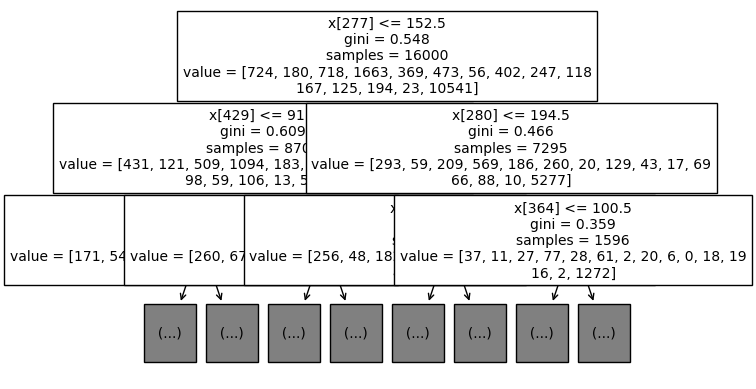

In [89]:
plotTree_dT = sklearn.tree.plot_tree( dT, max_depth=2, fontsize=10 )

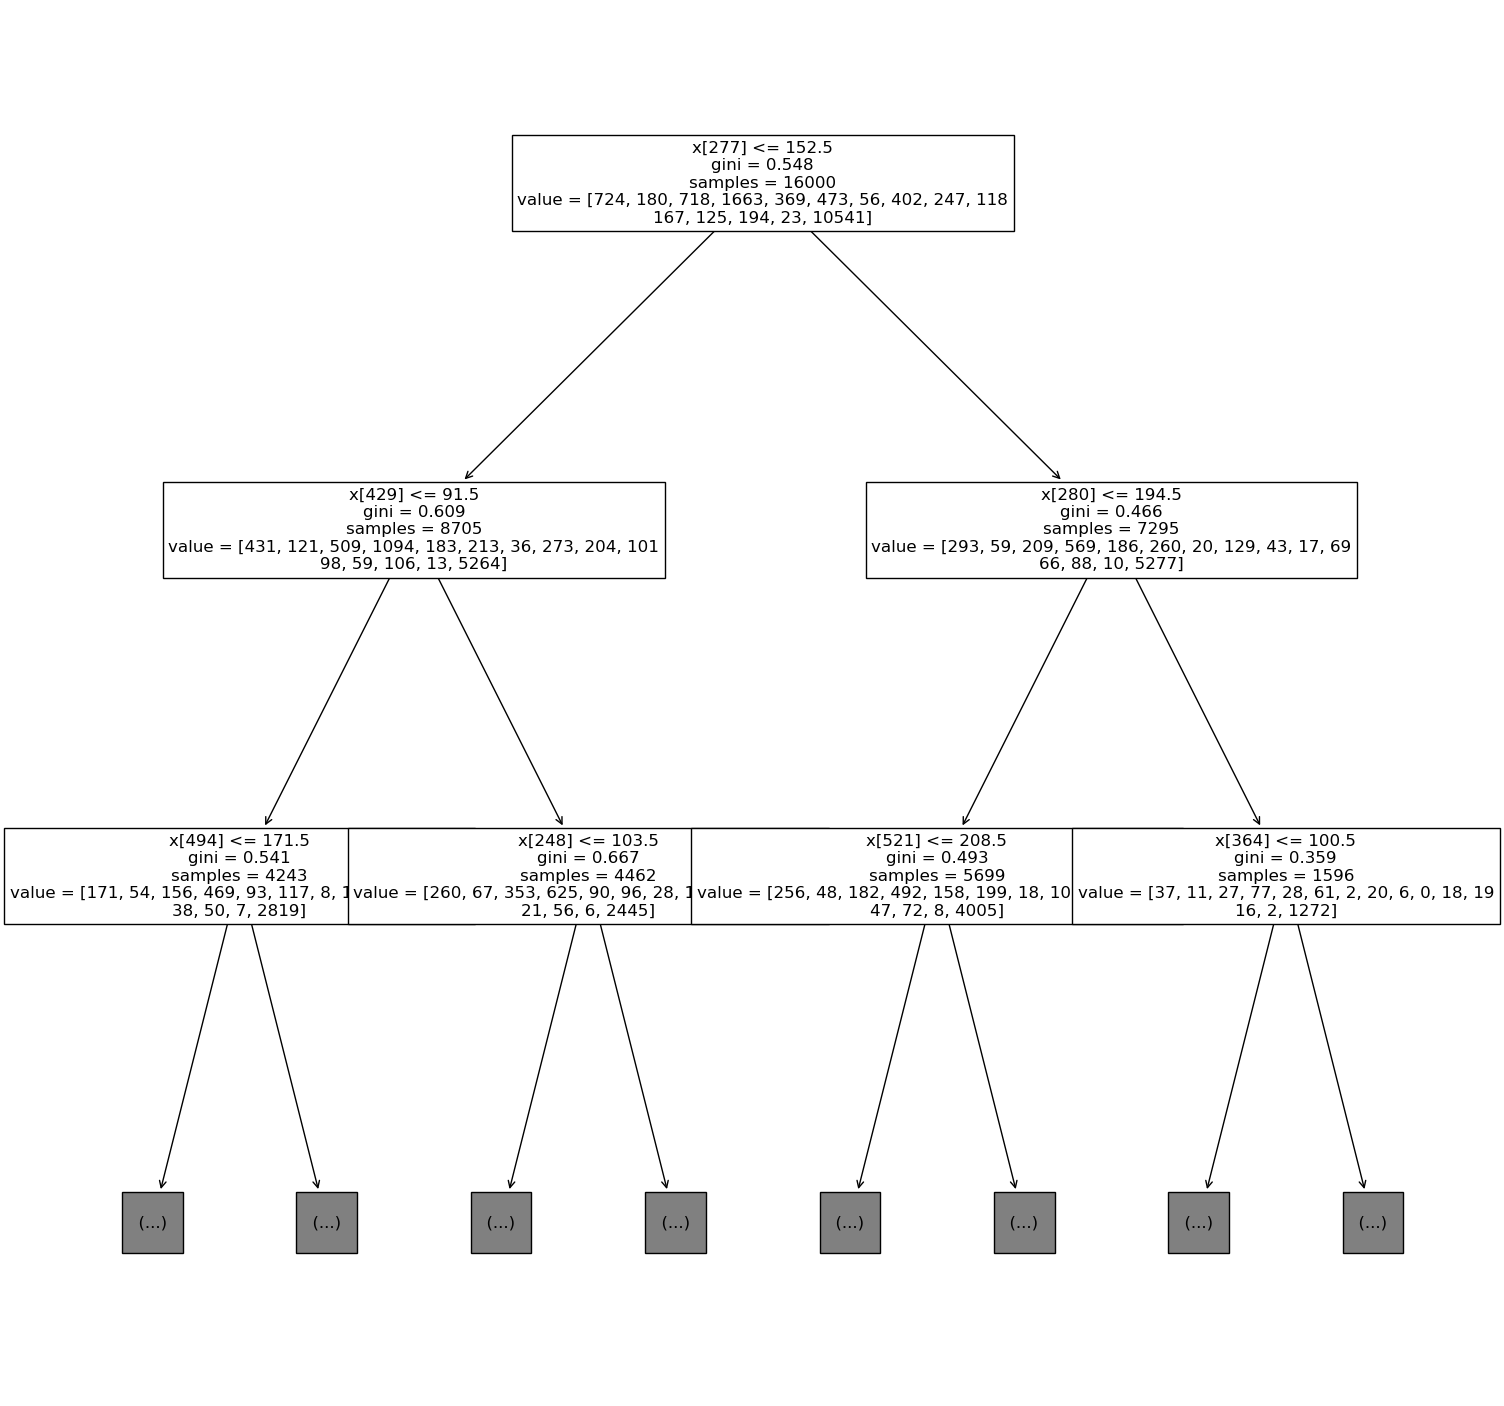

In [97]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,18))
plotTree = plot_tree( dT, max_depth=2, fontsize=12)



#plt.figure(figsize=(20,14))
#plotTree = plot_tree( dT, max_depth=2, fontsize=15, feature_names=tempFeatures)

In [81]:
from sklearn.pipeline import Pipeline

pipeDt = Pipeline([ 'model', DecisionTreeClassifier()
], verbose=True)

In [86]:
pipeDt.fit(X_train_samp, y_train_samp)
predTrain_dT = pipeDt.predict( X_train_samp ) 

ValueError: too many values to unpack (expected 2)

In [84]:
print( sklearn.metrics.classification_report( y_train_samp, predTrain_dT ) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00       718
           3       1.00      1.00      1.00      1663
           4       1.00      1.00      1.00       369
           5       1.00      1.00      1.00       473
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00       402
           8       1.00      1.00      1.00       247
           9       1.00      1.00      1.00       118
          10       1.00      1.00      1.00       167
          11       1.00      1.00      1.00       125
          12       1.00      1.00      1.00       194
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00     10541

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00   

In [80]:
plt.figure(figsize=(12,12))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15)


tempFeatures = pipeDt[:-1].get_feature_names_out().tolist()
plt.figure(figsize=(20,14))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15, feature_names=tempFeatures)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_feature_names_out'

In [60]:
#time to run our first random forest
import sklearn.metrics
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
rf1 = RandomForestClassifier()
rf1.fit( x_train, np.ravel(y_train) )



NameError: name 'X_train' is not defined

In [63]:
predTrain_rf1 = rf1.predict( x_train )

In [65]:
#these are some accuracy metrics we can use to evaluate our random forest
sklearn.metrics.balanced_accuracy_score( y_train, predTrain_rf1 )
print( sklearn.metrics.classification_report( y_train, predTrain_rf1 ) )


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2941
           1       1.00      1.00      1.00       754
           2       1.00      1.00      1.00      2730
           3       1.00      1.00      1.00      6663
           4       1.00      1.00      1.00      1481
           5       1.00      1.00      1.00      1883
           6       1.00      1.00      1.00       210
           7       1.00      1.00      1.00      1552
           8       1.00      1.00      1.00       951
           9       1.00      1.00      1.00       479
          10       1.00      1.00      1.00       635
          11       1.00      1.00      1.00       491
          12       1.00      1.00      1.00       759
          13       1.00      1.00      1.00        71
          14       1.00      1.00      1.00     42401

    accuracy                           1.00     64001
   macro avg       1.00      1.00      1.00     64001
weighted avg       1.00   

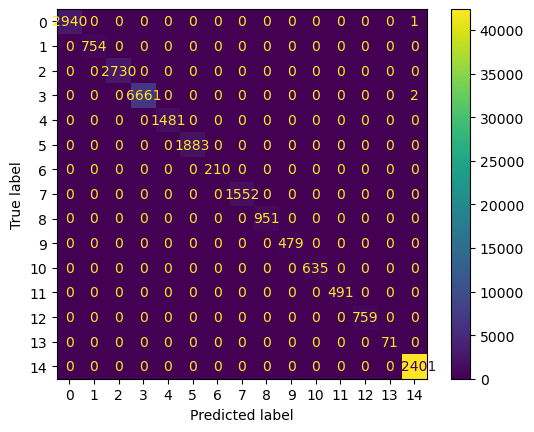

In [68]:
#lets generate a 15x15 confusion matrix to see what labels the model is 
#most likely to predict incorrectly
cm_rf1_Train = sklearn.metrics.confusion_matrix( y_train, predTrain_rf1 )
plotCm_rf1_Train = sklearn.metrics.ConfusionMatrixDisplay( cm_rf1_Train, display_labels=rf1.classes_ ).plot()



AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

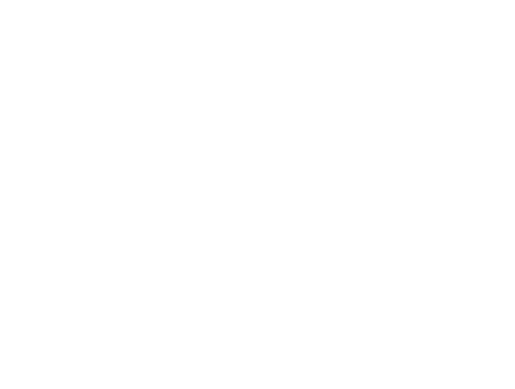

In [69]:
#we can also plot the tree
plotTree_rf1 = sklearn.tree.plot_tree( rf1, max_depth=3 )

In [ ]:
tempFeatures = rf1[:-1].get_feature_names_out().tolist() # weird syntax gets names from last step
plotTree_rf1_featurenames = sklearn.tree.plot_tree( rf1, max_depth=2, feature_names = tempFeatures )



In [73]:
#how important is each variable to the model
    #since there are alot of  features, maybe restrict this to the pixels that matter most
rf1Bar = pd.Series( rf1.feature_importances_, index= rf1.get_feature_names_out() ).plot.barh()


AttributeError: 'RandomForestClassifier' object has no attribute 'get_feature_names_out'